<a href="https://colab.research.google.com/github/aryan619348/Dog_vs_Cats_CNN/blob/main/Dogs_vs_Cats_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets First Import the Dogs vs cats data from kaggle: https://www.kaggle.com/c/dogs-vs-cats/overview

In [3]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-11-25 14:50:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   183MB/s    in 0.4s    

2021-11-25 14:50:46 (183 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Unzipping the data:

In [4]:
import os
import zipfile
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

Lets now define the directories for both dogs and cats for each data set that training dataset and testing dataset

In [5]:
#For training data
train_dog_dir=os.path.join('/content/cats_and_dogs_filtered/train/dogs')
train_cat_dir=os.path.join('/content/cats_and_dogs_filtered/train/cats')

#For testing data
test_dog_dir=os.path.join('/content/cats_and_dogs_filtered/validation/dogs')
test_cat_dir=os.path.join('/content/cats_and_dogs_filtered/validation/cats')

Lets see the total number of images for each category(dog and cat) and some of the images too

In [6]:
print('Total dog pics in training set= ',len(os.listdir(train_dog_dir)))
print('Total dog pics in training set= ',len(os.listdir(train_cat_dir)))

Total dog pics in training set=  1000
Total dog pics in training set=  1000


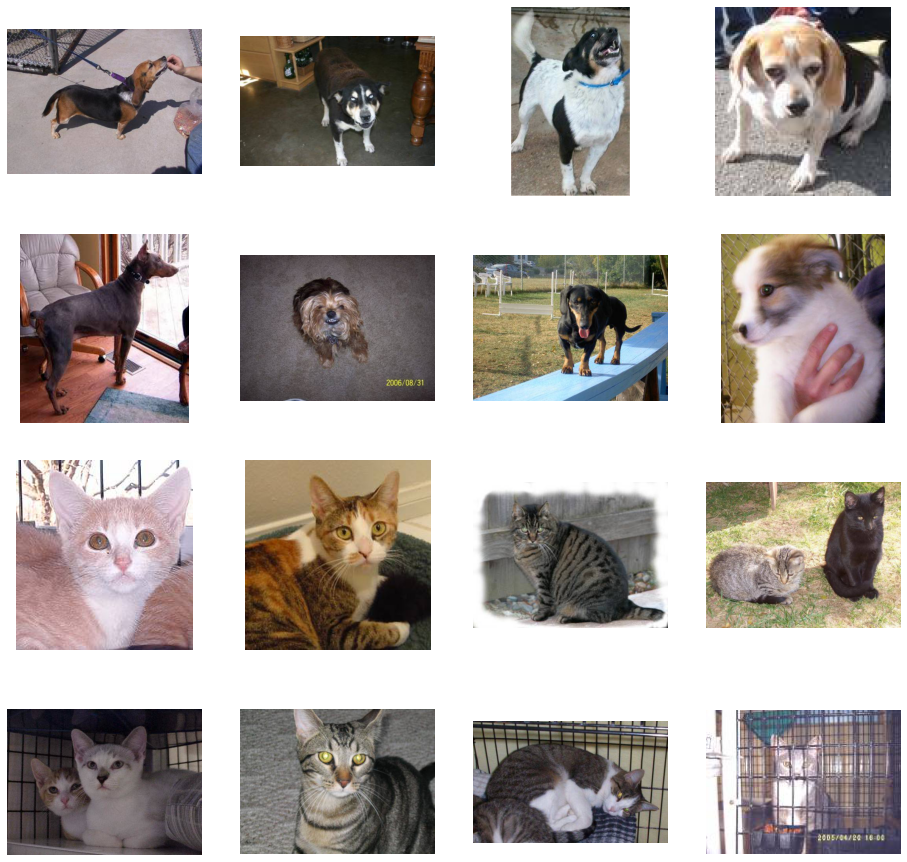

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrow=4
ncol=4
fig=plt.gcf()
fig.set_size_inches(ncol*4,nrow*4)
index=8
next_dog_pic=[os.path.join(train_dog_dir,fname)
                for fname in os.listdir(train_dog_dir)[0:index]]
next_cat_pic=[os.path.join(train_cat_dir,fname)
                for fname in os.listdir(train_cat_dir)[0:index]]

for i,img_path in enumerate(next_dog_pic+next_cat_pic):
  sp=plt.subplot(nrow,ncol,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

Now lets create a simple NN model with 5 convolution layers:

In [8]:
import tensorflow as tf

In [9]:
#Lets create the CNN model
model=tf.keras.Sequential([
    #first convolution:
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flaten to DNN
    tf.keras.layers.Flatten(),
    #hidden layer with 512 neurons
    tf.keras.layers.Dense(512,activation='relu'),
    #output 1 neuron= 0(horses) or 1(humans)
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Lets print the summary of the NN

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.

We will use the rmsprop optimizer with a learning rate of 0.001. 


In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Now lets perform Data Preprocessing and add the labels to the images using ImageDataGenerator

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)

train_generator=train_data_gen.flow_from_directory(
    '/content/cats_and_dogs_filtered/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

test_generator=train_data_gen.flow_from_directory(
    '/content/cats_and_dogs_filtered/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images

In [13]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=15,verbose=1,
                  validation_data=test_generator, validation_steps=50)

Epoch 1/15
100/100 [==============================] - 24s 108ms/step - loss: 0.7400 - accuracy: 0.5350 - val_loss: 0.6546 - val_accuracy: 0.6270
Epoch 2/15
100/100 [==============================] - 11s 107ms/step - loss: 0.6499 - accuracy: 0.6440 - val_loss: 0.6873 - val_accuracy: 0.5890
Epoch 3/15
100/100 [==============================] - 11s 107ms/step - loss: 0.5500 - accuracy: 0.7225 - val_loss: 0.5931 - val_accuracy: 0.6760
Epoch 4/15
100/100 [==============================] - 11s 106ms/step - loss: 0.4560 - accuracy: 0.7765 - val_loss: 0.6816 - val_accuracy: 0.6780
Epoch 5/15
100/100 [==============================] - 11s 107ms/step - loss: 0.3532 - accuracy: 0.8540 - val_loss: 0.7384 - val_accuracy: 0.6840
Epoch 6/15
100/100 [==============================] - 11s 108ms/step - loss: 0.2695 - accuracy: 0.8810 - val_loss: 0.6504 - val_accuracy: 0.7370
Epoch 7/15
100/100 [==============================] - 11s 107ms/step - loss: 0.1819 - accuracy: 0.9210 - val_loss: 1.5636 - val_ac

By the end we can see that we get an training accuracy fo 99.1% which is quite impressive!
But the validation/testing accuracy is only 71.7% which is quite good considering we are using only a subset of the entire dataset.

Now lets input some images from online and see how the models perform.

In [14]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving cat_1.jpeg to cat_1.jpeg
Saving cat_2.jpeg to cat_2.jpeg
Saving cat_3.jpeg to cat_3.jpeg
Saving dog_1.jpeg to dog_1.jpeg
Saving dog_2.jpeg to dog_2.jpeg
Saving dog_3.jpeg to dog_3.jpeg
[0.]
cat_1.jpeg is a cat
[0.]
cat_2.jpeg is a cat
[1.]
cat_3.jpeg is a dog
[1.]
dog_1.jpeg is a dog
[1.]
dog_2.jpeg is a dog
[1.]
dog_3.jpeg is a dog


We can see that our results are quite good, only 1 image= cat_3.jpeg is predicted incorrectly.

One of the reasons for such errors could be overfitting, especially since we are not using the entire dataset

First lets see how overfitting effects our model

In order to better see the effects of overfitting lets re-run the model with a few more epochs say 50

In [18]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=50,verbose=1,
                  validation_data=test_generator, validation_steps=50)

Epoch 1/50
100/100 [==============================] - 11s 109ms/step - loss: 0.0235 - accuracy: 0.9930 - val_loss: 1.6702 - val_accuracy: 0.7450
Epoch 2/50
100/100 [==============================] - 11s 107ms/step - loss: 0.0286 - accuracy: 0.9935 - val_loss: 2.0454 - val_accuracy: 0.7430
Epoch 3/50
100/100 [==============================] - 11s 107ms/step - loss: 0.0342 - accuracy: 0.9955 - val_loss: 2.1980 - val_accuracy: 0.7320
Epoch 4/50
100/100 [==============================] - 11s 107ms/step - loss: 0.0708 - accuracy: 0.9875 - val_loss: 1.7445 - val_accuracy: 0.7250
Epoch 5/50
100/100 [==============================] - 11s 108ms/step - loss: 0.0105 - accuracy: 0.9980 - val_loss: 2.0505 - val_accuracy: 0.7330
Epoch 6/50
100/100 [==============================] - 11s 108ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 2.5377 - val_accuracy: 0.7290
Epoch 7/50
100/100 [==============================] - 11s 108ms/step - loss: 0.0217 - accuracy: 0.9945 - val_loss: 2.7773 - val_ac

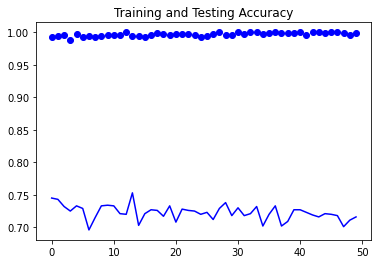

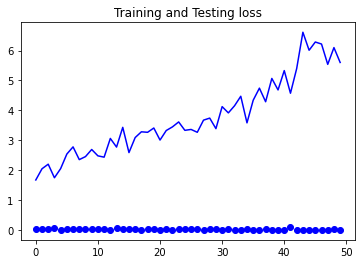

In [19]:
train_acc=history.history['accuracy']
test_acc=history.history['val_accuracy']
train_loss =history.history['loss']
test_loss=history.history['val_loss']
epochs=range(len(train_acc))

plt.plot(epochs,train_acc,'bo',label='training_accuracy')
plt.plot(epochs,test_acc,'b',label='testing_accuracy')
plt.title('Training and Testing Accuracy')
plt.figure()
plt.plot(epochs,train_loss,'bo',label='training_loss')
plt.plot(epochs,test_loss,'b',label='testing_loss')
plt.title('Training and Testing loss')

plt.show()

We can see that the Training accuracy almost hits 100%, while testing accuracy is still around 71% and while the loss per epoch reduces while traning but the loss increases while testing

This is a clear example of overfitting!


To solve this issue lets try create model using image augmentation!

We will add rotation from 0-40 degrees.

We will then add shift to move the subject around the picture

We will then add shearing, zoom and horizontal flips to create various scenarios

We will also add fill_mode='nearest' to make sure that all the lost pixels are filled in 

In [20]:
train_data_gen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_data_gen=ImageDataGenerator(rescale=1/255)

train_generator=train_data_gen.flow_from_directory(
    '/content/cats_and_dogs_filtered/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

test_generator=train_data_gen.flow_from_directory(
    '/content/cats_and_dogs_filtered/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=50,verbose=1,
                  validation_data=test_generator, validation_steps=50)

Epoch 1/50
100/100 [==============================] - 26s 256ms/step - loss: 0.8718 - accuracy: 0.5740 - val_loss: 0.6997 - val_accuracy: 0.5750
Epoch 2/50
100/100 [==============================] - 25s 253ms/step - loss: 0.6783 - accuracy: 0.6215 - val_loss: 0.6239 - val_accuracy: 0.6610
Epoch 3/50
100/100 [==============================] - 25s 255ms/step - loss: 0.6252 - accuracy: 0.6615 - val_loss: 0.6636 - val_accuracy: 0.5980
Epoch 4/50
100/100 [==============================] - 25s 254ms/step - loss: 0.6295 - accuracy: 0.6715 - val_loss: 0.7273 - val_accuracy: 0.6150
Epoch 5/50
100/100 [==============================] - 25s 255ms/step - loss: 0.6433 - accuracy: 0.6595 - val_loss: 0.7110 - val_accuracy: 0.5510
Epoch 6/50
100/100 [==============================] - 25s 255ms/step - loss: 0.6098 - accuracy: 0.6900 - val_loss: 0.5966 - val_accuracy: 0.6810
Epoch 7/50
100/100 [==============================] - 25s 254ms/step - loss: 0.5933 - accuracy: 0.7050 - val_loss: 0.5571 - val_ac

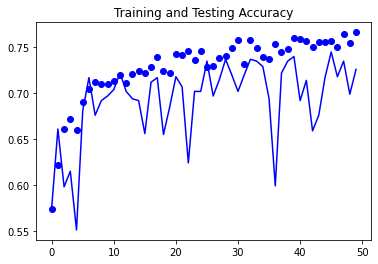

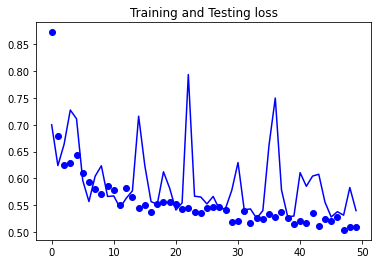

In [24]:
train_acc=history.history['accuracy']
test_acc=history.history['val_accuracy']
train_loss =history.history['loss']
test_loss=history.history['val_loss']
epochs=range(len(train_acc))

plt.plot(epochs,train_acc,'bo',label='training_accuracy')
plt.plot(epochs,test_acc,'b',label='testing_accuracy')
plt.title('Training and Testing Accuracy')
plt.figure()
plt.plot(epochs,train_loss,'bo',label='training_loss')
plt.plot(epochs,test_loss,'b',label='testing_loss')
plt.title('Training and Testing loss')

plt.show()

Here we can see that while both the trainig and testing accuracy are lower, theya are both trending upwards, and maybe some more epochs will actually help us achieve higher accuracy